In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('all_data.csv')
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [59]:
df.shape

(186850, 6)

In [60]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [62]:
#Reusable Custom functions

def numbers_only(seriesName):
    seriesNamed=pd.to_numeric(seriesName,errors='coerce')
    seriesNamed=seriesNamed.dropna(how='any').astype(int)
    return seriesNamed





def date_time(df_to_convert,col_to_convert,col_to_add):
    df_to_convert[col_to_convert]=pd.to_datetime(df_to_convert[col_to_convert],errors='coerce').dropna()
    if col_to_add == 'year':
        
        df_to_convert['year'] = df_to_convert[col_to_convert].dt.year
        return df_to_convert
        
    elif col_to_add == 'month':
        
        df_to_convert['month'] = df_to_convert[col_to_convert].dt.month
        return df_to_convert
    
    elif col_to_add == 'day':
        
        df_to_convert['day'] = df_to_convert[col_to_convert].dt.day
        return df_to_convert
    
    elif col_to_add == 'hour':
        
        df_to_convert['hour'] = df_to_convert[col_to_convert].dt.hour
        return df_to_convert
    else:
        return df_to_convert
    
    
    
    
    
def text_split(col_to_split,delimiter,index_to_retrieve):
    return col_to_split.str.split(delimiter,expand=True)[int(index_to_retrieve)]





## Initial cleaning and adding required columns

In [63]:
df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')
df1 = df[df['Order Date'].dt.year==2019].dropna(how='any',axis=0)
df1['Price Each'] = numbers_only(df1['Price Each'])
df1['Quantity Ordered'] = numbers_only(df1['Quantity Ordered'])
df1['sales']= df1['Quantity Ordered']*df1['Price Each']
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",22
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11


In [64]:
df1.describe()

,Quantity Ordered,Price Each,sales
count,185916.000000,185916.000000,185916.000000
mean,1.124368,183.640988,184.615633
std,0.442749,332.932700,333.180070
min,1.000000,2.000000,2.000000
25%,1.000000,11.000000,11.000000
50%,1.000000,14.000000,14.000000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


# State with most sales in 2019

In [65]:
df1['State'] = text_split(df1['Purchase Address'],',',1) + ' ' +text_split( text_split(df1["Purchase Address"],",",2)," ",1)
df_state_sale = df1.groupby('State').sum().sort_values('sales',ascending=False).reset_index()


In [159]:
df_state_sale.head()

,State,Quantity Ordered,Price Each,sales
0,San Francisco CA,50226,8175687,8221192
1,Los Angeles CA,33288,5398262,5425974
2,New York City NY,27916,4615488,4641545
3,Boston MA,22524,3621186,3643003
4,Atlanta GA,16602,2768857,2782841


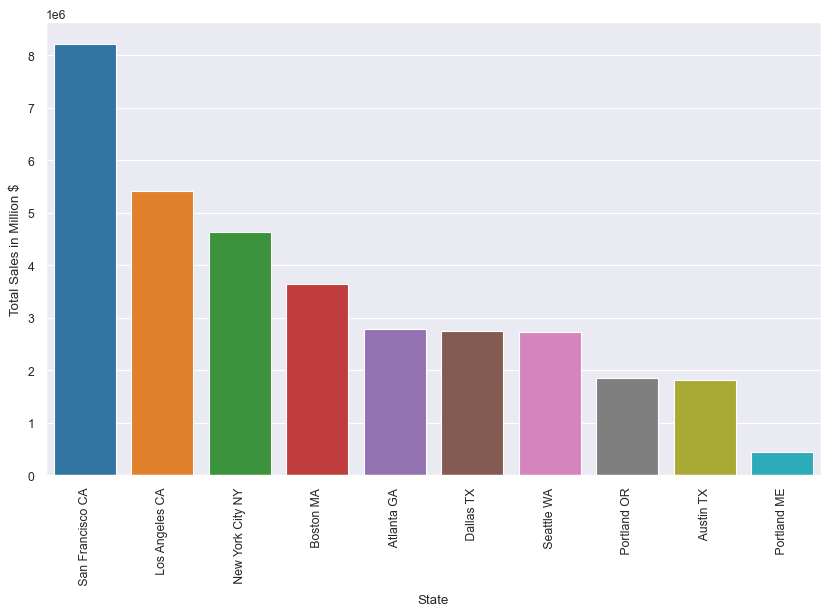

In [68]:
plt.figure(figsize=(10,6),dpi=100)
sns.set_style('darkgrid')
sns.set_context('paper')
sns.barplot(x='State',y='sales',data=df_state_sale)
plt.xticks(rotation=90)
plt.ylabel('Total Sales in Million $')
plt.show()

# Time-wise Sales analysis

In [96]:
df_time = df1
df_time['Order Date']=pd.to_datetime(df_time['Order Date'])
df_time['month']= df_time['Order Date'].dt.month
df_time['day']= df_time['Order Date'].dt.day
df_time['hour']=df_time['Order Date'].dt.hour

In [70]:
df_time_sales = df_time.groupby(['month','day','hour'])[['sales']].sum().reset_index()

<Figure size 1500x2000 with 0 Axes>

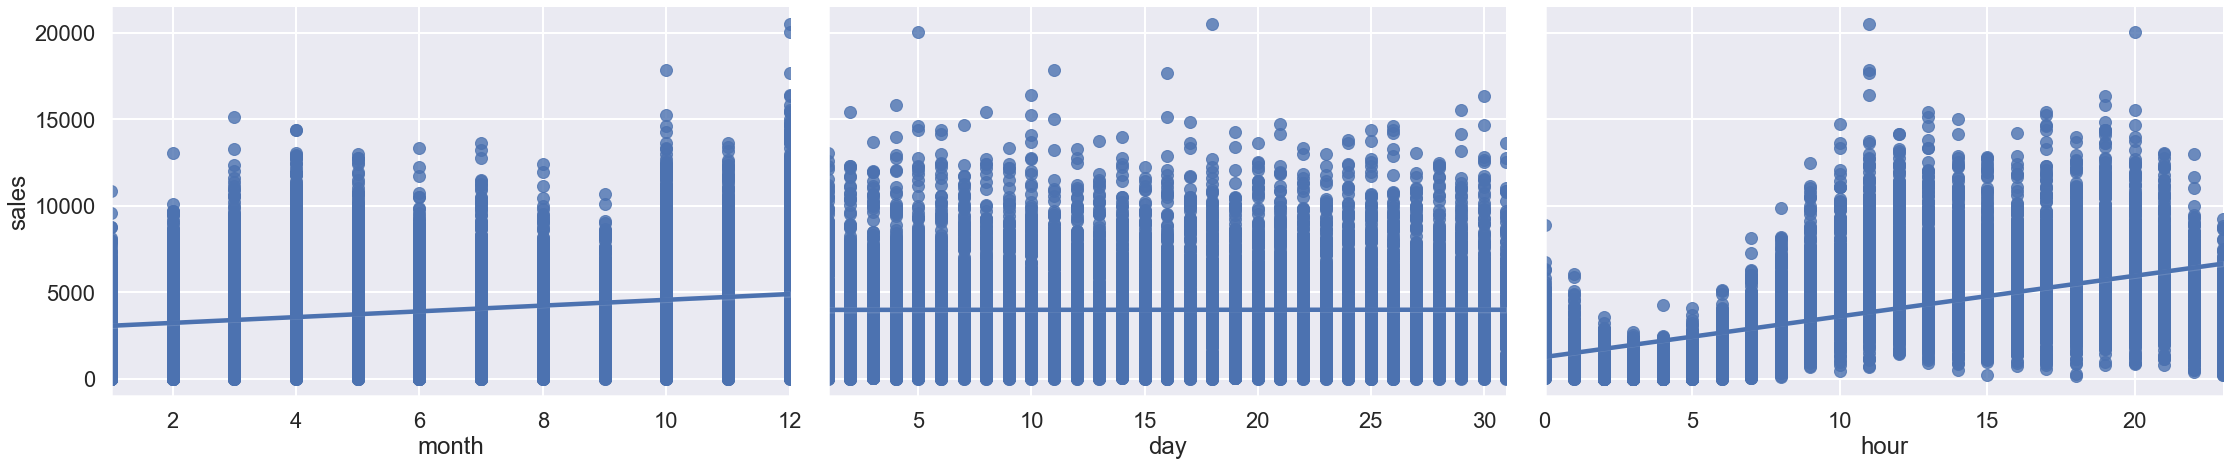

In [150]:
plt.figure(figsize=(15,20),dpi=100)
sns.set_context('poster')
sns.pairplot(df_time_sales,x_vars=['month','day','hour'],y_vars='sales',kind='reg',aspect=1.5,height=7)
plt.show()

## Month of 2019 with most sales

<Figure size 1296x864 with 0 Axes>

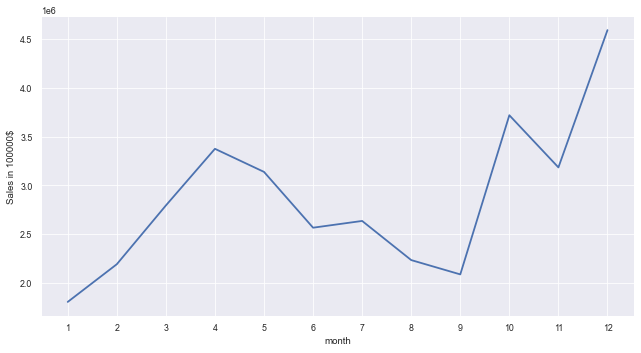

In [152]:
plt.figure(figsize=(18,12))
plt.rcParams["figure.autolayout"] = True
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
sns.set_context('paper',font_scale=1, rc={"lines.linewidth": 1.8})
sns.relplot(x='month',y='sales',data = df_time_sales.groupby('month')[['sales']].sum().reset_index(),kind='line',aspect=1.8)
plt.ylabel('Sales in 100000$')
plt.xticks(np.arange(1,13))
plt.show()

## Day of every month with most sales

<Figure size 3240x864 with 0 Axes>

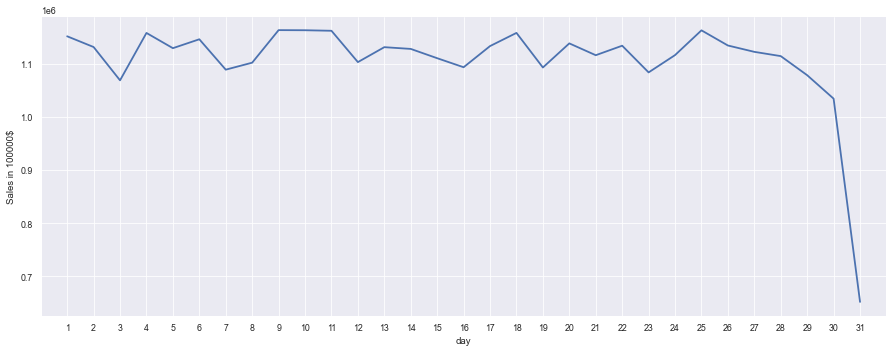

In [151]:
plt.figure(figsize=(45,12))
plt.rcParams["figure.autolayout"] = True
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
sns.set_context('paper',font_scale=1, rc={"lines.linewidth": 1.8})
sns.relplot(x='day',y='sales',data = df_time_sales.groupby('day')[['sales']].sum().reset_index(),kind='line',aspect=2.5)
plt.ylabel('Sales in 100000$')
plt.xlim(0,32)
plt.xticks(ticks = np.arange(1,32))

plt.show()

## Hour of every day with most sales

<Figure size 2592x864 with 0 Axes>

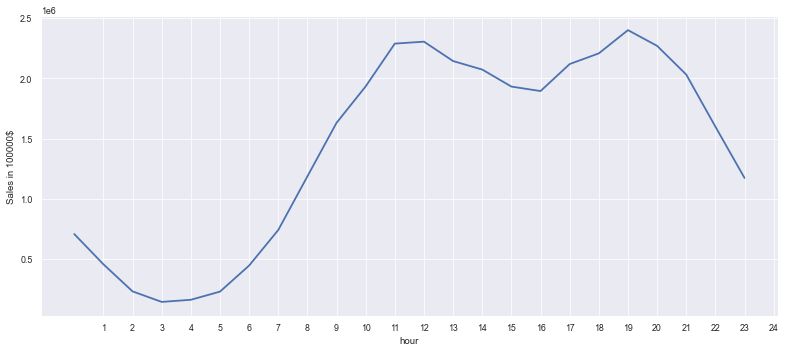

In [153]:
plt.figure(figsize=(36,12))
plt.rcParams["figure.autolayout"] = True
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
sns.set_context('paper',font_scale=1, rc={"lines.linewidth": 1.8})
sns.relplot(x='hour',y='sales',data = df_time_sales.groupby('hour')[['sales']].sum().reset_index(),kind='line',aspect=2.2)
plt.ylabel('Sales in 100000$')
plt.xticks(np.arange(1,25))
plt.show()

# Products most often sold together 


In [158]:
df_prod = df1[df1['Order ID'].duplicated(keep=False)]
df_prod['Product']=df_prod.groupby('Order ID')[['Product']].transform(lambda x: ','.join(x))

prod_count = df_prod[['Order ID','Product']].drop_duplicates('Order ID')
sales_product = df_prod.groupby(['Order ID','Product'])[['sales']].sum().reset_index('Product')





<ipython-input-158-beed5df5a135>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod['Product']=df_prod.groupby('Order ID')[['Product']].transform(lambda x: ','.join(x))


In [76]:
sold_products = sales_product.groupby('Product')[['sales']].sum().sort_values('sales',ascending=False).reset_index()
prod_s_to_plot = sold_products.iloc[:8]

In [77]:
prod_counted = prod_count.groupby('Product')[['Order ID']].count().sort_values('Order ID',ascending=False).reset_index()
prod_counted = prod_counted.rename(columns={'Order ID':'Orders Placed'})
prod_c_to_plot = prod_counted[prod_counted['Orders Placed']>100]


<Figure size 1500x900 with 0 Axes>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


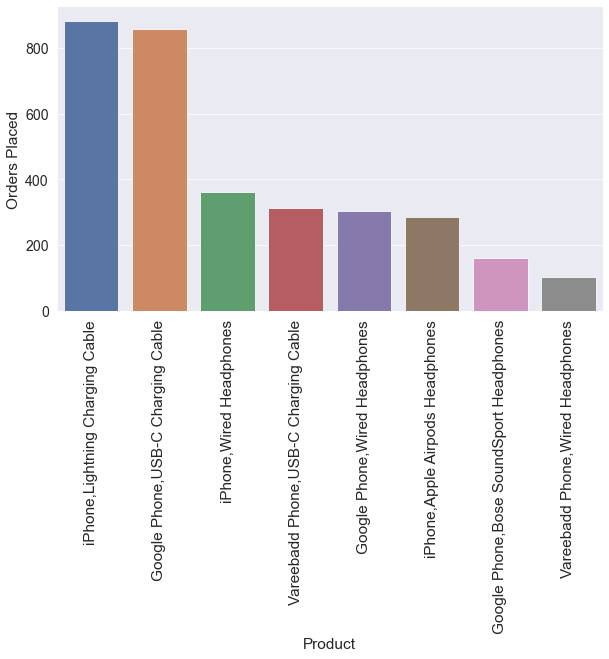

In [213]:
plt.figure(figsize=(15,9),dpi=100)
sns.set_style("darkgrid")
sns.set_context(context='paper', font_scale=1.6)
sns_plot= sns.catplot(x='Product',y='Orders Placed',data=prod_c_to_plot,height=5, aspect=2,kind='bar')
plt.xticks(ticks = np.arange(0,len(prod_c_to_plot['Product']*2)), labels=prod_c_to_plot['Product'],rotation=90,size='medium')

# sns_plot.savefig('Product by count')
plt.show()



<Figure size 1500x900 with 0 Axes>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


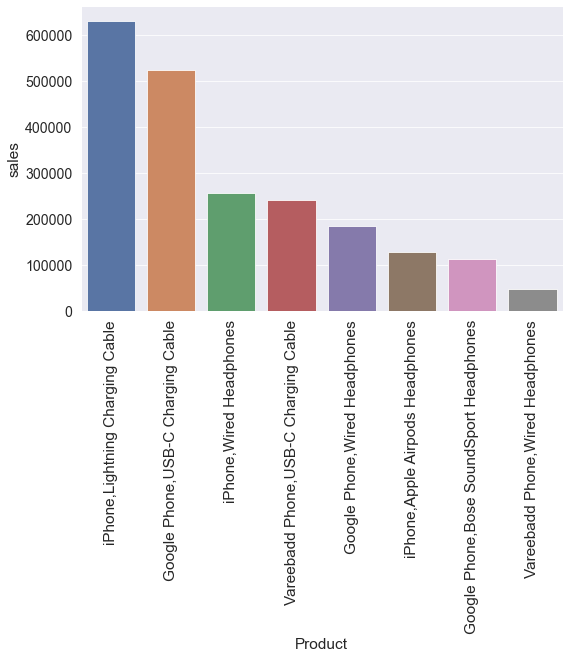

In [209]:


plt.figure(figsize=(15,9),dpi=100)
sns.set_style("darkgrid")
sns.set_context(context='paper', font_scale=1.6)
sns_plot= sns.catplot(x='Product',y='sales',data=prod_s_to_plot,height=5, aspect=2,kind='bar')
plt.xticks(ticks = np.arange(0,len(prod_c_to_plot['Product']*2)), labels=prod_c_to_plot['Product'],rotation=90,size='medium')
# sns_plot.savefig('Product by sales')
plt.show()
